<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2013/13_loading_and_preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Memuat Dataset California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Membagi data menjadi set pelatihan dan validasi
# Langkah ini akan membuat variabel X_train dan y_train
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# 3. Melakukan penskalaan fitur (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 4. Membuat pipeline tf.data (sekarang tidak akan error)
# Kita membuat dataset dari data yang sudah di-scaling
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(32)
dataset = dataset.prefetch(1)

# Anda sekarang bisa menggunakan 'dataset' ini untuk melatih model
print("Dataset pipeline berhasil dibuat!")
# Contoh: model.fit(dataset, epochs=10)

Dataset pipeline berhasil dibuat!


In [7]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Memuat dan Mempersiapkan Data
# Memuat dataset perumahan California
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Membagi data menjadi set pelatihan dan validasi/uji
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Melakukan scaling pada fitur (praktik standar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# 2. Membuat Pipeline Data (tf.data)
# Pipeline untuk pelatihan
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(1)

# Pipeline untuk validasi
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(32)


# 3. Menyesuaikan (Adapt) Lapisan Normalisasi
# Lapisan normalisasi perlu mempelajari mean dan standar deviasi dari data pelatihan
# Kita buat dataset khusus untuk adaptasi yang hanya berisi fitur (X_train)
norm_train_data = tf.data.Dataset.from_tensor_slices(X_train).batch(32)
normalization_layer = tf.keras.layers.Normalization()
normalization_layer.adapt(norm_train_data)


# 4. Membangun dan Meng-compile Model Regresi
# Arsitektur model sudah diperbaiki untuk tugas regresi
model = tf.keras.Sequential([
    normalization_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1) # <- Output untuk regresi: 1 neuron, tanpa aktivasi
])

# Meng-compile model dengan loss function dan optimizer yang sesuai untuk regresi
model.compile(loss="mean_squared_error", # <- Loss untuk regresi
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["RootMeanSquaredError"])


# 5. Melatih Model
# Model sekarang bisa dilatih menggunakan dataset pipeline
print("Memulai pelatihan model...")
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)
print("\nPelatihan selesai.")

Memulai pelatihan model...
Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 1.6252 - loss: 2.7181 - val_RootMeanSquaredError: 2.3642 - val_loss: 5.5892
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 0.8824 - loss: 0.7789 - val_RootMeanSquaredError: 1.0181 - val_loss: 1.0364
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8158 - loss: 0.6657 - val_RootMeanSquaredError: 0.8319 - val_loss: 0.6920
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7831 - loss: 0.6133 - val_RootMeanSquaredError: 0.7636 - val_loss: 0.5831
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.7564 - loss: 0.5722 - val_RootMeanSquaredError: 0.7323 - val_loss: 0.5363
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7426 - loss: 0.5519 - val_RootMeanSquaredError: 0.7091 - val_loss: 0.5029
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMea

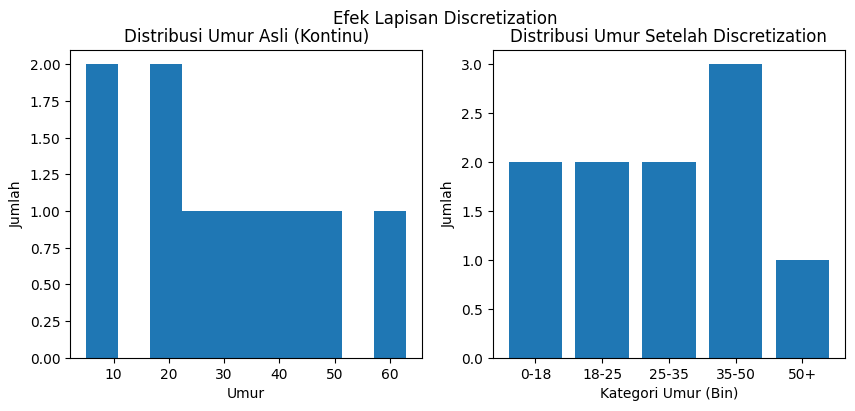

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Membuat data umur sampel
sample_ages = np.array([10., 22., 63., 38., 48., 18., 5., 33., 45., 25.])

# Lapisan Discretization dengan 5 bin
discretization_layer = tf.keras.layers.Discretization(
    bin_boundaries=[18., 25., 35., 50.] # Batas untuk 5 bin
)
discretized_ages = discretization_layer(sample_ages)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(sample_ages, bins=10)
ax1.set_title("Distribusi Umur Asli (Kontinu)")
ax1.set_xlabel("Umur")
ax1.set_ylabel("Jumlah")

ax2.hist(discretized_ages, bins=np.arange(-0.5, 5.5, 1), rwidth=0.8)
ax2.set_xticks(range(5))
ax2.set_xticklabels(["0-18", "18-25", "25-35", "35-50", "50+"])
ax2.set_title("Distribusi Umur Setelah Discretization")
ax2.set_xlabel("Kategori Umur (Bin)")
ax2.set_ylabel("Jumlah")

plt.suptitle("Efek Lapisan Discretization")
plt.show()